# Hello World of Machine Learning
The best small project to start with on a new tool is the classification of iris flowers (e.g. the iris dataset).

Attributes are numeric so you have to figure out how to load and handle data.
It is a classification problem, allowing you to practice with perhaps an easier type of supervised learning algorithm.
It is a multi-class classification problem (multi-nominal) that may require some specialized handling.
It only has 4 attributes and 150 rows, meaning it is small and easily fits into memory (and a screen or A4 page).
All of the numeric attributes are in the same units and the same scale, not requiring any special scaling or transforms to get started.
Let’s get started with your hello world machine learning project in Python.

# Check Versions

In [1]:
# Python version
import sys
print('Python: {}'.format(sys.version))

# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))

# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))

# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.2 (tags/v3.7.2:9a3ffc0492, Dec 23 2018, 23:09:28) [MSC v.1916 64 bit (AMD64)]
numpy: 1.16.0
matplotlib: 3.0.2
pandas: 0.23.4
sklearn: 0.20.2


#  Start Python and Import libraries

In [6]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Load dataset

In [33]:

#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
#names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
#dataset = pandas.read_csv(url, names=names)

names = ['order_products_value', 'customer_city', 'product_category_name']
dataset = pandas.read_csv('F:\\py\\Produtos_4.csv', names=names)

# Dimensions of Dataset

In [34]:
# shape
print(dataset.shape)

(299, 3)


# show the data head

In [35]:

print(dataset.tail(20))

     order_products_value  customer_city  product_category_name
279                   880              3                      5
280                   918              3                      5
281                 16999              3                      5
282                  1100              3                      5
283                  1969              3                      5
284                   700              3                      5
285                   599              3                      5
286                  1499              3                      5
287                  1040              3                      5
288                   550              3                      5
289                   470              3                      5
290                   649              3                      5
291                   438              3                      5
292                   799              3                      5
293                  2990              3

In [61]:
# class distribution
print(dataset.groupby('product_category_name').size())
print(dataset.groupby('customer_city').size())

product_category_name
1    59
2    60
3    60
4    60
5    60
dtype: int64
customer_city
1     99
2    101
3     99
dtype: int64


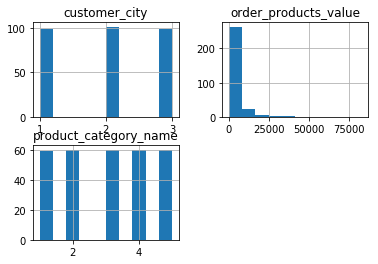

In [62]:
# histograms
dataset.hist()
plt.show()

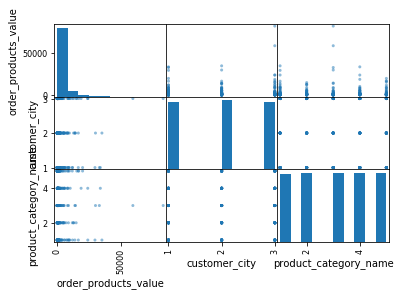

In [64]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

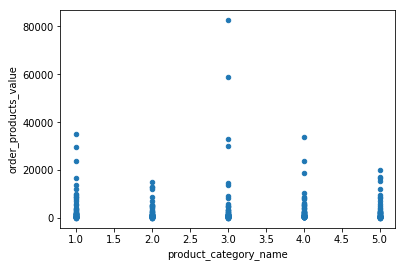

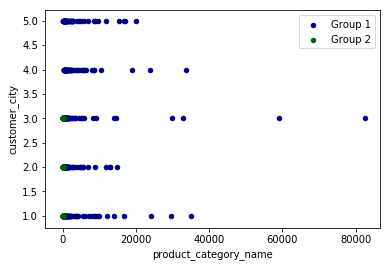

In [70]:
#df = pd.DataFrame(np.random.rand(50, 4), columns=['a', 'b', 'c', 'd'])

#df.plot.scatter(x='a', y='b');
dataset.plot.scatter(x='product_category_name', y='order_products_value');
                  
ax = dataset.plot.scatter(x='order_products_value', y='product_category_name', color='DarkBlue', label='Group 1');
dataset.plot.scatter(x='product_category_name', y='customer_city', color='DarkGreen', label='Group 2', ax=ax);


In [54]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:2]
Y = array[:,2]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
print('X_train', X_train)
print('X_validation', X_validation)
print('Y_train', Y_train)
print('Y_validation', Y_validation)

X_train [[  499     2]
 [  650     1]
 [ 1290     2]
 [  349     3]
 [  849     1]
 [  619     3]
 [  599     1]
 [ 1290     2]
 [  870     3]
 [  550     3]
 [  559     1]
 [ 1199     1]
 [  599     3]
 [  399     1]
 [ 1489     1]
 [ 7999     2]
 [ 2999     2]
 [12996     2]
 [  499     1]
 [  299     2]
 [  379     3]
 [ 1759     1]
 [  650     1]
 [   99     1]
 [ 8999     3]
 [  599     1]
 [  639     3]
 [ 4999     3]
 [ 2050     3]
 [13999     2]
 [ 4990     2]
 [ 1440     3]
 [  600     1]
 [  490     3]
 [  599     3]
 [ 5799     2]
 [ 3746     3]
 [ 1700     2]
 [  599     3]
 [  390     1]
 [  433     1]
 [ 4220     3]
 [11999     3]
 [  940     3]
 [  790     2]
 [  880     3]
 [19998     1]
 [  650     3]
 [  939     1]
 [  899     1]
 [  189     1]
 [  449     1]
 [  362     1]
 [  899     3]
 [ 1050     1]
 [  699     3]
 [  359     2]
 [ 1190     2]
 [  899     3]
 [ 1150     2]
 [  749     3]
 [ 2499     2]
 [ 1899     2]
 [  350     3]
 [ 1359     3]
 [16666     1]
 [

In [55]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

c:\users\-\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\-\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\-\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\-\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\use

LR: 0.133696 (0.048229)
LDA: 0.129529 (0.046985)
KNN: 0.163043 (0.072983)
CART: 0.146558 (0.043103)
NB: 0.204529 (0.095382)
SVM: 0.150725 (0.046708)


c:\users\-\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\-\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\-\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\u

In [57]:
# Make predictions on validation dataset
# Make predictions on validation dataset
SVM = SVC()
SVM.fit(X_train, Y_train)
predictions =SVM.predict(X_validation)
print(accuracy_score(Y_validation, predictions))





0.18333333333333332


c:\users\-\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# our Final prediction

In [59]:
test_X=[[22 ,3]
print(SVM.predict(test_X))

SyntaxError: invalid syntax (<ipython-input-59-e10c7557b6d9>, line 2)